In [1]:
%%shell
git clone https://github.com/FleshRazer/tmp.git

Cloning into 'tmp'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 24 (delta 0), reused 6 (delta 0), pack-reused 16
Receiving objects: 100% (24/24), 42.35 MiB | 29.99 MiB/s, done.


In [2]:
%%shell
pip3 install --quiet datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 11.2 MB/s eta 0:00:00


In [14]:
import matplotlib.pyplot as plt

from tmp.src.data import data_utils

In [11]:
df = data_utils.get_filtered_paranmt_df()
df.head()

,Unnamed: 0,reference,translation,similarity,lenght_diff,ref_tox,trn_tox
0,0,"If Alkar is flooding her with psychic waste, t...","if Alkar floods her with her mental waste, it ...",0.785171,0.010309,0.014195,0.981983
1,1,Now you're getting nasty.,you're becoming disgusting.,0.749687,0.071429,0.065473,0.999039
2,2,"Well, we could spare your life, for one.","well, we can spare your life.",0.919051,0.268293,0.213313,0.985068
3,3,"Ah! Monkey, you've got to snap out of it.","monkey, you have to wake up.",0.664333,0.309524,0.053362,0.994215
4,4,I've got orders to put her down.,I have orders to kill her.,0.726639,0.181818,0.009402,0.999348


In [12]:
print("Average reference length:", df["reference"].str.len().mean())
print("    Max reference length:", df["reference"].str.len().max())
print()

print("Average translation length:", df["translation"].str.len().mean())
print("    Max translation length:", df["translation"].str.len().max())

Average reference length: 53.88074118561313
    Max reference length: 1401

Average translation length: 49.818068216630294
    Max translation length: 979


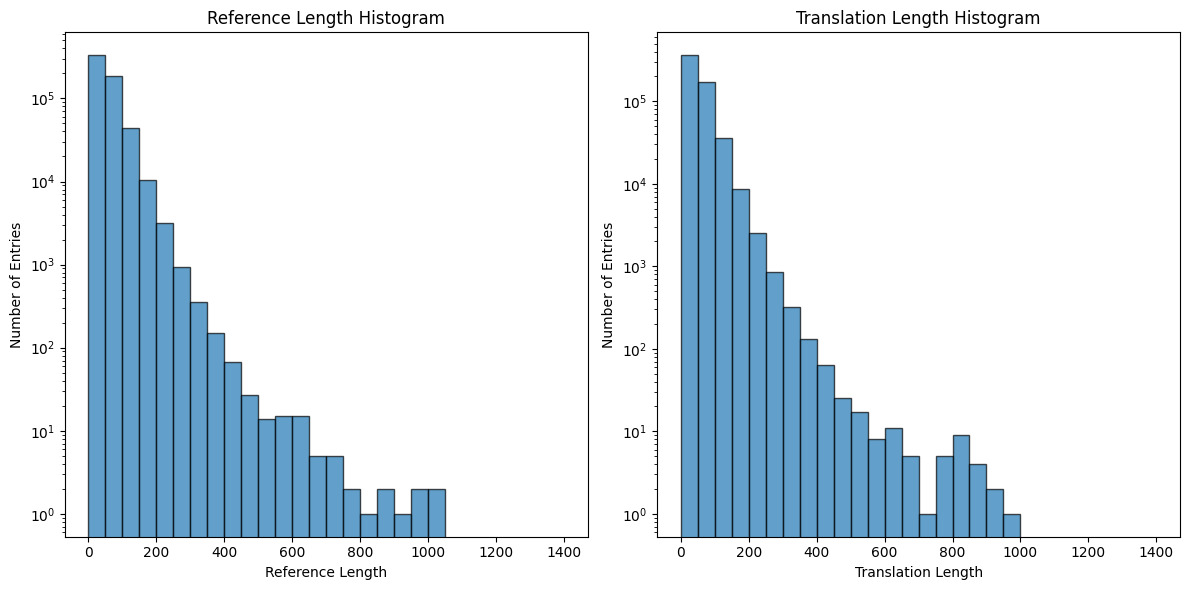

In [13]:
reference_length_ranges = range(0, 1402, 50)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df["reference"].str.len(), bins=reference_length_ranges, edgecolor='k', alpha=0.7)
plt.yscale('log')
plt.title("Reference Length Histogram")
plt.xlabel("Reference Length")
plt.ylabel("Number of Entries")

plt.subplot(1, 2, 2)
plt.hist(df["translation"].str.len(), bins=reference_length_ranges, edgecolor='k', alpha=0.7)
plt.yscale('log')
plt.title("Translation Length Histogram")
plt.xlabel("Translation Length")
plt.ylabel("Number of Entries")

plt.tight_layout()
plt.show()